In [8]:
from scipy.optimize import root_scalar
from tabulate import tabulate
import matplotlib.pyplot as plt

def f(x):
    return x**3 -x -2

def fprime(x):
    return 3*x**2 - 1

def fprime2(x):
    return 6*x


results = [
    ("Bisection", root_scalar(f, method='bisect', bracket=[1, 2])),
    ("Brentq", root_scalar(f, method='brentq', bracket=[1, 2])),
    ("Brenth", root_scalar(f, method='brenth', bracket=[1, 2])),
    ("Ridder", root_scalar(f, method='ridder', bracket=[1, 2])),
    ("Toms748", root_scalar(f, method='toms748', bracket=[1, 2])),
    ("Secant", root_scalar(f, method='secant', x0=1, x1=2)),
    ("Newton", root_scalar(f, method='newton', x0=1.5, fprime=fprime)),
    ("Halley", root_scalar(f, method='halley', x0=1.5, fprime=fprime, fprime2=fprime2))
]

table_data = []
method_names = []
iterations = []

for name, res in results:
    table_data.append([name, f'{res.root:.6f}', res.iterations])
    method_names.append(name)
    iterations.append(res.iterations)

print(tabulate(table_data, headers=["Method", "Root", "Iterations"], tablefmt='psql'))

+-----------+---------+--------------+
| Method    |    Root |   Iterations |
|-----------+---------+--------------|
| Bisection | 1.52138 |           39 |
| Brentq    | 1.52138 |            8 |
| Brenth    | 1.52138 |            8 |
| Ridder    | 1.52138 |            4 |
| Toms748   | 1.52138 |            4 |
| Secant    | 1.52138 |            7 |
| Newton    | 1.52138 |            4 |
| Halley    | 1.52138 |            2 |
+-----------+---------+--------------+


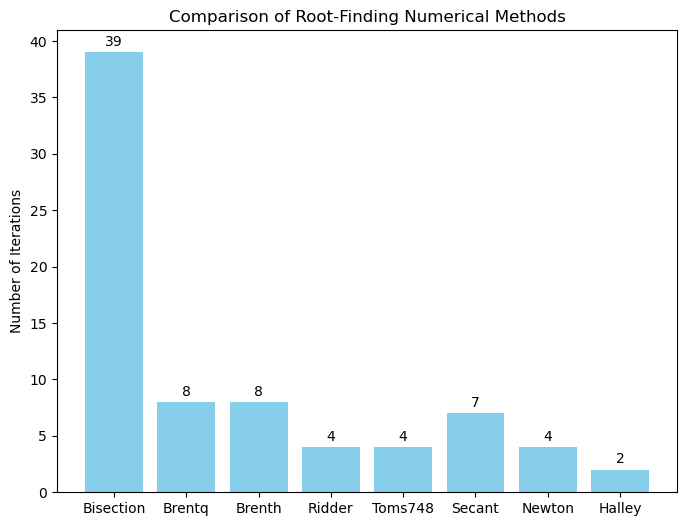

In [25]:
plt.figure(figsize=(8, 6))
bars = plt.bar(method_names, iterations, color='skyblue')
plt.title('Comparison of Root-Finding Numerical Methods')
plt.ylabel("Number of Iterations")


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}', ha='center', va='bottom')

plt.show()

In [46]:
def bisection(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        print("Bisection Method fails.")
        return None
    
    table = []

    for i in range(1, max_iter + 1):
        c = ( a + b) / 2
        abs_error = (b - a) / 2
        rel_error = abs_error / abs(c) if c != 0 else 0
        table.append([i, a, b, c, f(c), abs_error, rel_error])
        if abs_error < tol:
            break
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
    print(tabulate(table, headers=['iter', 'a', 'b', 'c', 'f(c)', 'Abs Error', 'Rel Error'], floatfmt='.6f', tablefmt='psql'))
    return c
root = bisection(f, 1, 2)
print(f"\nApproximate root: {root:.6f}")

+--------+----------+----------+----------+-----------+-------------+-------------+
|   iter |        a |        b |        c |      f(c) |   Abs Error |   Rel Error |
|--------+----------+----------+----------+-----------+-------------+-------------|
|      1 | 1.000000 | 2.000000 | 1.500000 | -0.125000 |    0.500000 |    0.333333 |
|      2 | 1.500000 | 2.000000 | 1.750000 |  1.609375 |    0.250000 |    0.142857 |
|      3 | 1.500000 | 1.750000 | 1.625000 |  0.666016 |    0.125000 |    0.076923 |
|      4 | 1.500000 | 1.625000 | 1.562500 |  0.252197 |    0.062500 |    0.040000 |
|      5 | 1.500000 | 1.562500 | 1.531250 |  0.059113 |    0.031250 |    0.020408 |
|      6 | 1.500000 | 1.531250 | 1.515625 | -0.034054 |    0.015625 |    0.010309 |
|      7 | 1.515625 | 1.531250 | 1.523438 |  0.012250 |    0.007812 |    0.005128 |
|      8 | 1.515625 | 1.523438 | 1.519531 | -0.010971 |    0.003906 |    0.002571 |
|      9 | 1.519531 | 1.523438 | 1.521484 |  0.000622 |    0.001953 |    0.0

In [45]:
def secant(f, x0, x1, tol=1e-6, max_iter=100):
    table = []
    for i in range(1, max_iter + 1):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        abs_error = abs(x2 - x1)
        rel_error = abs_error / abs(x2) if x2 != 0 else 0
        table.append([i, x0, x1, x2, f(x2), abs_error, rel_error])
        if abs_error < tol:
            break
        x0, x1 = x1, x2
    print(tabulate(table, headers=["iter", "x0", "x1", "x2", "f(x2)", "Abs Error", "Rel Error"], floatfmt=".6f", tablefmt="psql"))
    return x2

root = secant(f, 1, 2)
print(f"\nApproximate root: {root:.6f}")

+--------+----------+----------+----------+-----------+-------------+-------------+
|   iter |       x0 |       x1 |       x2 |     f(x2) |   Abs Error |   Rel Error |
|--------+----------+----------+----------+-----------+-------------+-------------|
|      1 | 1.000000 | 2.000000 | 1.333333 | -0.962963 |    0.666667 |    0.500000 |
|      2 | 2.000000 | 1.333333 | 1.462687 | -0.333339 |    0.129353 |    0.088435 |
|      3 | 1.333333 | 1.462687 | 1.531169 |  0.058626 |    0.068483 |    0.044726 |
|      4 | 1.462687 | 1.531169 | 1.520926 | -0.002693 |    0.010243 |    0.006735 |
|      5 | 1.531169 | 1.520926 | 1.521376 | -0.000020 |    0.000450 |    0.000296 |
|      6 | 1.520926 | 1.521376 | 1.521380 |  0.000000 |    0.000003 |    0.000002 |
|      7 | 1.521376 | 1.521380 | 1.521380 | -0.000000 |    0.000000 |    0.000000 |
+--------+----------+----------+----------+-----------+-------------+-------------+

Approximate root: 1.521380


In [44]:
def newton(f, fprime, x0, tol=1e-6, max_iter=100):

    table = []
    
    for i in range(1, max_iter + 1):
        x1 = x0 - f(x0) / fprime(x0)
        abs_error = abs(x1 - x0)
        rel_error = abs_error / abs(x1) if x1 != 0 else 0
        table.append([i, x0, x1, f(x1), abs_error, rel_error])

        if abs_error < tol:
            break
        x0 = x1
    print(tabulate(table, headers=["iter", "x0", "x1", "f(x1)", "Abs Error", "Rel Error"], floatfmt=".6f", tablefmt="psql"))
    return x1
root = newton(f, fprime, 1.5)
print(f"\nApproximate root: {root:.6f}")

+--------+----------+----------+----------+-------------+-------------+
|   iter |       x0 |       x1 |    f(x1) |   Abs Error |   Rel Error |
|--------+----------+----------+----------+-------------+-------------|
|      1 | 1.500000 | 1.521739 | 0.002137 |    0.021739 |    0.014286 |
|      2 | 1.521739 | 1.521380 | 0.000001 |    0.000359 |    0.000236 |
|      3 | 1.521380 | 1.521380 | 0.000000 |    0.000000 |    0.000000 |
+--------+----------+----------+----------+-------------+-------------+

Approximate root: 1.521380


In [48]:
def halley(f, fprime, fprime2, x0, tol=1e-6, max_iter=100):

    table = []

    for i in range(1, max_iter + 1):
        x1 = x0 - (2 * f(x0) * fprime(x0)) / (2 * fprime(x0) ** 2 - f(x0) * fprime2(x0))
        abs_error = abs(x1 - x0)
        rel_error = abs_error / abs(x1) if x1 != 0 else 0
        table.append([i, x0, x1, f(x1), abs_error, rel_error])
        if abs_error < tol:
            break
        x0 = x1
    print(tabulate(table, headers=['iter', 'x0', 'x1', 'f(x)', 'Abs Error', 'Rel Error'], floatfmt='0.6f', tablefmt='psql'))
    return x1
root = halley(f, fprime, fprime2, 1.5)
print(f"\nApproximate root: {root:.6f}")

+--------+----------+----------+-----------+-------------+-------------+
|   iter |       x0 |       x1 |      f(x) |   Abs Error |   Rel Error |
|--------+----------+----------+-----------+-------------+-------------|
|      1 | 1.500000 | 1.521375 | -0.000025 |    0.021375 |    0.014050 |
|      2 | 1.521375 | 1.521380 |  0.000000 |    0.000004 |    0.000003 |
|      3 | 1.521380 | 1.521380 |  0.000000 |    0.000000 |    0.000000 |
+--------+----------+----------+-----------+-------------+-------------+

Approximate root: 1.521380



Bisection Method:
+--------+----------+----------+----------+-----------+-------------+
|   iter |        a |        b |        c |      f(c) |   Abs Error |
|--------+----------+----------+----------+-----------+-------------|
|      1 | 1.000000 | 2.000000 | 1.500000 | -0.125000 |    0.500000 |
|      2 | 1.500000 | 2.000000 | 1.750000 |  1.609375 |    0.250000 |
|      3 | 1.500000 | 1.750000 | 1.625000 |  0.666016 |    0.125000 |
|      4 | 1.500000 | 1.625000 | 1.562500 |  0.252197 |    0.062500 |
|      5 | 1.500000 | 1.562500 | 1.531250 |  0.059113 |    0.031250 |
|      6 | 1.500000 | 1.531250 | 1.515625 | -0.034054 |    0.015625 |
|      7 | 1.515625 | 1.531250 | 1.523438 |  0.012250 |    0.007812 |
|      8 | 1.515625 | 1.523438 | 1.519531 | -0.010971 |    0.003906 |
|      9 | 1.519531 | 1.523438 | 1.521484 |  0.000622 |    0.001953 |
|     10 | 1.519531 | 1.521484 | 1.520508 | -0.005179 |    0.000977 |
|     11 | 1.520508 | 1.521484 | 1.520996 | -0.002279 |    0.000488 |
|

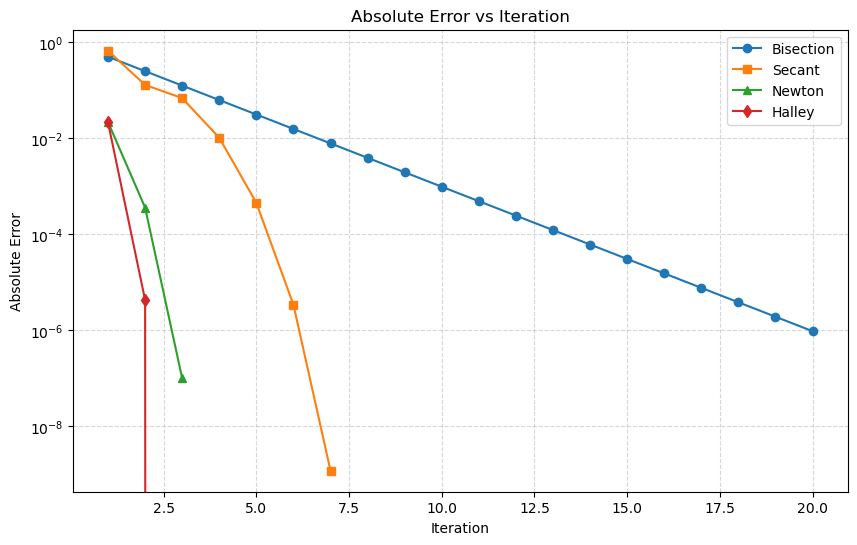

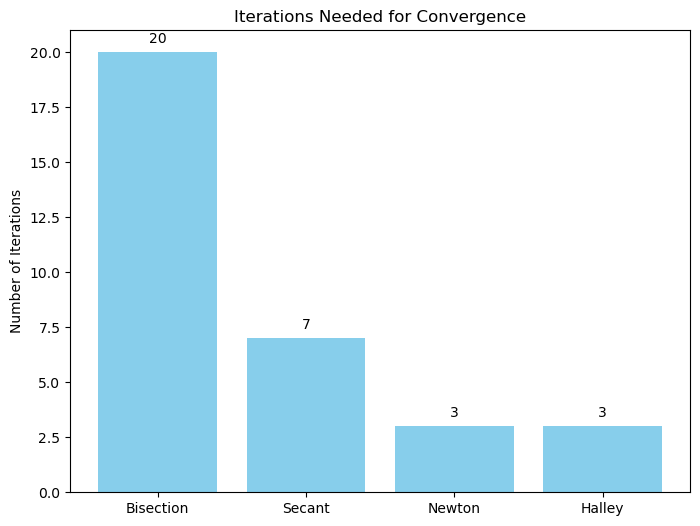

In [50]:
from tabulate import tabulate
import matplotlib.pyplot as plt

# Define functions
def f(x):
    return x**3 - x - 2

def fprime(x):
    return 3*x**2 - 1

def fprime2(x):
    return 6*x

tol = 1e-6
max_iter = 100

# ----------------- Methods -------------------

def bisection(f, a, b, tol=tol, max_iter=max_iter):
    table = []
    for i in range(1, max_iter+1):
        c = (a + b)/2
        abs_error = (b - a)/2
        table.append([i, a, b, c, f(c), abs_error])
        if abs_error < tol or abs(f(c)) < tol:
            break
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return table, c

def secant(f, x0, x1, tol=tol, max_iter=max_iter):
    table = []
    for i in range(1, max_iter+1):
        x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        abs_error = abs(x2 - x1)
        table.append([i, x0, x1, x2, f(x2), abs_error])
        if abs_error < tol:
            break
        x0, x1 = x1, x2
    return table, x2

def newton(f, fprime, x0, tol=tol, max_iter=max_iter):
    table = []
    for i in range(1, max_iter+1):
        x1 = x0 - f(x0)/fprime(x0)
        abs_error = abs(x1 - x0)
        table.append([i, x0, x1, f(x1), abs_error])
        if abs_error < tol:
            break
        x0 = x1
    return table, x1

def halley(f, fprime, fprime2, x0, tol=tol, max_iter=max_iter):
    table = []
    for i in range(1, max_iter+1):
        x1 = x0 - (2*f(x0)*fprime(x0))/(2*fprime(x0)**2 - f(x0)*fprime2(x0))
        abs_error = abs(x1 - x0)
        table.append([i, x0, x1, f(x1), abs_error])
        if abs_error < tol:
            break
        x0 = x1
    return table, x1

# ----------------- Run Methods -------------------
b_table, b_root = bisection(f, 1, 2)
s_table, s_root = secant(f, 1, 2)
n_table, n_root = newton(f, fprime, 1.5)
h_table, h_root = halley(f, fprime, fprime2, 1.5)

# ----------------- Tabulate -------------------
print("\nBisection Method:")
print(tabulate(b_table, headers=["iter","a","b","c","f(c)","Abs Error"], floatfmt=".6f", tablefmt="psql"))

print("\nSecant Method:")
print(tabulate(s_table, headers=["iter","x0","x1","x2","f(x2)","Abs Error"], floatfmt=".6f", tablefmt="psql"))

print("\nNewton-Raphson Method:")
print(tabulate(n_table, headers=["iter","x0","x1","f(x1)","Abs Error"], floatfmt=".6f", tablefmt="psql"))

print("\nHalley Method:")
print(tabulate(h_table, headers=["iter","x0","x1","f(x1)","Abs Error"], floatfmt=".6f", tablefmt="psql"))

# ----------------- Absolute Error vs Iteration Plot -------------------
plt.figure(figsize=(10,6))
plt.plot([row[0] for row in b_table], [row[-1] for row in b_table], 'o-', label='Bisection')
plt.plot([row[0] for row in s_table], [row[-1] for row in s_table], 's-', label='Secant')
plt.plot([row[0] for row in n_table], [row[-1] for row in n_table], '^-', label='Newton')
plt.plot([row[0] for row in h_table], [row[-1] for row in h_table], 'd-', label='Halley')
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.title("Absolute Error vs Iteration")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# ----------------- Iteration Count Bar Chart -------------------
methods = ['Bisection','Secant','Newton','Halley']
iterations = [len(b_table), len(s_table), len(n_table), len(h_table)]
plt.figure(figsize=(8,6))
bars = plt.bar(methods, iterations, color='skyblue')
plt.ylabel("Number of Iterations")
plt.title("Iterations Needed for Convergence")

# Add iteration numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}', ha='center', va='bottom')

plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# ===================================
# PINN for Root Finding
# ===================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class PINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

model = PINN().to(device)

x_colloc = torch.linspace(1, 2, 200, dtype=torch.float32, device=device, requires_grad=True).reshape(-1, 1)

def pinn_loss():
    x_pred = model(x_colloc)
    f_vals = x_pred**3 - x_pred - 2
    loss_pde = torch.mean(f_vals**2)
    return loss_pde

optimizer_adam = optim.Adam(model.parameters(), lr=5e-4)

for it in range(10000):
    optimizer_adam.zero_grad()
    loss = pinn_loss()
    loss.backward()
    optimizer_adam.step()
    if it % 1000 == 0:
        print(f'Adam Iter {it}, Loss {loss.item():.3e}')

optimizer_lbfgs = optim.LBFGS(model.parameters(), lr=1.0, max_iter=500, line_search_fn='strong_wolfe')

def closure():
    optimizer_lbfgs.zero_grad()
    loss = pinn_loss()
    loss.backward()
    return loss
optimizer_lbfgs.step(closure)

# Find root by evaluating PINN and finding minimum of |f(x)|
x_test = torch.linspace(1, 2, 1000, dtype=torch.float32, device=device).reshape(-1, 1)
with torch.no_grad():
    x_pinn_vals = model(x_test)
    f_pinn = x_pinn_vals**3 - x_pinn_vals - 2
    min_idx = torch.argmin(torch.abs(f_pinn))
    pinn_root = x_pinn_vals[min_idx].item()

print(f"\nPINN Root: {pinn_root:.6f}, f({pinn_root:.6f}) = {f(pinn_root):.6f}")
print(f"Exact Root: {n_root:.6f}, f({n_root:.6f}) = {f(n_root):.6f}")


In [ ]:
# ===================================
# Comparison Plot: All Methods vs PINN
# ===================================
x_plot = np.linspace(1, 2, 200)
f_plot = [f(xi) for xi in x_plot]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x_pinn_plot = torch.linspace(1, 2, 200, dtype=torch.float32, device=device).reshape(-1, 1)
with torch.no_grad():
    x_pinn_out = model(x_pinn_plot)
    f_pinn_plot = (x_pinn_out**3 - x_pinn_out - 2).cpu().numpy()

plt.plot(x_plot, f_plot, 'k-', label='f(x) = x³ - x - 2', linewidth=2)
plt.plot(x_pinn_out.cpu().numpy(), f_pinn_plot, 'r--', label='PINN f(x)', linewidth=2)
plt.axhline(y=0, color='g', linestyle=':', linewidth=1)
plt.axvline(x=n_root, color='b', linestyle='--', alpha=0.5, label=f'Exact Root ≈ {n_root:.6f}')
plt.axvline(x=pinn_root, color='r', linestyle='--', alpha=0.5, label=f'PINN Root ≈ {pinn_root:.6f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('PINN vs Exact Function')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
methods_pinn = ['Bisection', 'Secant', 'Newton', 'Halley', 'PINN']
roots_pinn = [b_root, s_root, n_root, h_root, pinn_root]
errors_pinn = [abs(f(r)) for r in roots_pinn]
plt.bar(methods_pinn, errors_pinn, color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'coral'])
plt.yscale('log')
plt.ylabel('|f(root)| (log scale)')
plt.title('Residual Error Comparison')
plt.xticks(rotation=15)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
